<a href="https://colab.research.google.com/github/Yeow34/LifeExpectancyPrediction/blob/main/Batch_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.drop(df.columns[[0,1,2]], axis=1, inplace=True)
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df=df.fillna(df.mean())
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df_mean=df.mean()
df_std=df.std()
df_normalized=(df-df_mean)/df_std
df_normalized

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.444372,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,0.255316,-3.278080,0.925649,-0.732827,-0.323390,-0.525158,0.389909,2.812651,2.772807,-0.725277,-0.579832
1,-0.980783,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,0.274014,-1.051303,0.933981,-0.859730,-0.323390,-0.522994,-0.230896,2.880918,2.817423,-0.739924,-0.610466
2,-0.980783,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,0.292712,-0.880013,0.913150,-0.775128,-0.323390,-0.521544,0.352655,2.926429,2.862039,-0.769218,-0.641099
3,-1.022854,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,0.317642,-0.665900,1.075632,-0.648225,-0.323390,-0.518635,-0.168287,2.971940,2.928963,-0.803395,-0.671733
4,-1.054408,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,0.342573,-0.623077,0.804829,-0.605924,-0.323390,-0.564797,-0.181635,3.040207,2.973578,-0.847336,-0.763634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-2.621569,4.498728,-0.028017,-0.062013,-0.371370,-0.572920,-0.208296,-0.563099,-0.000223,-0.665900,0.496531,-0.732827,6.273976,-0.535046,0.000448,1.037720,1.010479,-1.076806,-0.855535
2934,-2.600533,4.434254,-0.036497,-0.138616,-0.371370,-3.273606,-0.123970,-0.583171,-0.006455,-3.235257,0.242393,-0.605924,6.884478,-0.535123,-0.002220,1.128742,1.122019,-1.023100,-0.763634
2935,-2.568979,-0.739815,-0.044977,-0.044139,-0.371370,-0.351552,-0.184490,-0.603244,-0.012688,-0.408964,0.246560,-0.479021,7.494981,-0.565268,-0.234651,-0.828234,-0.796464,-0.979159,-0.610466
2936,-2.516390,4.200534,-0.044977,-0.736121,-0.371370,-0.218732,-0.164869,-0.623316,-0.018921,-0.280496,0.092410,-0.309816,7.947934,-0.527874,-0.007195,-0.737212,-0.707233,-0.979159,-0.671733


In [ ]:
df_normalized=df_normalized.fillna(1)
df_normalized.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.444372,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,0.255316,-3.278080,0.925649,-0.732827,-0.32339,-0.525158,0.389909,2.812651,2.772807,-0.725277,-0.579832
1,-0.980783,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,0.274014,-1.051303,0.933981,-0.859730,-0.32339,-0.522994,-0.230896,2.880918,2.817423,-0.739924,-0.610466
2,-0.980783,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,0.292712,-0.880013,0.913150,-0.775128,-0.32339,-0.521544,0.352655,2.926429,2.862039,-0.769218,-0.641099
3,-1.022854,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,0.317642,-0.665900,1.075632,-0.648225,-0.32339,-0.518635,-0.168287,2.971940,2.928963,-0.803395,-0.671733
4,-1.054408,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,0.342573,-0.623077,0.804829,-0.605924,-0.32339,-0.564797,-0.181635,3.040207,2.973578,-0.847336,-0.763634


In [ ]:
df_normalized.insert(1,"bias",1)
df_normalized.head()

,Life expectancy,bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.444372,1,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,0.255316,-3.278080,0.925649,-0.732827,-0.32339,-0.525158,0.389909,2.812651,2.772807,-0.725277,-0.579832
1,-0.980783,1,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,0.274014,-1.051303,0.933981,-0.859730,-0.32339,-0.522994,-0.230896,2.880918,2.817423,-0.739924,-0.610466
2,-0.980783,1,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,0.292712,-0.880013,0.913150,-0.775128,-0.32339,-0.521544,0.352655,2.926429,2.862039,-0.769218,-0.641099
3,-1.022854,1,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,0.317642,-0.665900,1.075632,-0.648225,-0.32339,-0.518635,-0.168287,2.971940,2.928963,-0.803395,-0.671733
4,-1.054408,1,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,0.342573,-0.623077,0.804829,-0.605924,-0.32339,-0.564797,-0.181635,3.040207,2.973578,-0.847336,-0.763634


In [ ]:
m=len(df)
m

2938

In [ ]:
theta_0=np.array([0]*len(df.columns[1::]))
theta_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
theta_1=0
theta_1

0

In [ ]:
y=df.iloc[:,0]
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [ ]:
x=df_normalized[df_normalized.columns[1::]]
x.head()

,bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,0.255316,-3.278080,0.925649,-0.732827,-0.32339,-0.525158,0.389909,2.812651,2.772807,-0.725277,-0.579832
1,1,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,0.274014,-1.051303,0.933981,-0.859730,-0.32339,-0.522994,-0.230896,2.880918,2.817423,-0.739924,-0.610466
2,1,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,0.292712,-0.880013,0.913150,-0.775128,-0.32339,-0.521544,0.352655,2.926429,2.862039,-0.769218,-0.641099
3,1,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,0.317642,-0.665900,1.075632,-0.648225,-0.32339,-0.518635,-0.168287,2.971940,2.928963,-0.803395,-0.671733
4,1,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,0.342573,-0.623077,0.804829,-0.605924,-0.32339,-0.564797,-0.181635,3.040207,2.973578,-0.847336,-0.763634


In [ ]:
alpha=0.01
np.random.seed(5)
theta=np.random.rand(19)*2
theta

array([0.44398634, 1.74146461, 0.41343831, 1.83722182, 0.97682238,
       1.22348773, 1.53181571, 1.03683598, 0.593601  , 0.37544246,
       0.16148254, 1.47688059, 0.88261845, 0.31661974, 1.75987406,
       0.54817292, 0.82847004, 0.59215987, 1.25757582])

In [ ]:
prediction=np.dot(x,theta.T)
prediction

array([-1.67873299, -2.2389049 , -0.96963957, ...,  0.08815969,
        8.72025325, 12.14233433])

In [ ]:
def gradient_descent(x,y,m,theta,alpha):
  cost_list=[]
  theta_list=[]
  prediction_list=[]
  run=True
  cost_list.append(10000000)

  i=0
  while run:
    prediction=np.dot(x,theta.T)
    prediction_list.append(prediction)
    error=prediction-y
    cost=1/(2*m)*np.dot(error.T,error)
    cost_list.append(cost)
    theta=theta-(alpha*(1/m)*np.dot(x.T,error))
    theta_list.append(theta)
    if cost_list[i]-cost_list[i+1]<1e-12:
      run=False
    i+=1
  cost_list.pop(0)
  return prediction_list,cost_list,theta_list

In [ ]:
x.shape

(2938, 19)

In [ ]:
theta.shape

(19,)

In [ ]:
y.shape

(2938,)

In [ ]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [ ]:
theta

array([ 6.92249317e+01, -2.52326483e+00,  1.17353999e+01,  4.75270738e-01,
        2.66542694e-01, -3.18933691e-01, -2.34680357e-01,  8.64841423e-01,
       -1.19303738e+01,  6.71334392e-01,  2.13894587e-01,  9.37884928e-01,
       -2.39428784e+00,  4.81195977e-01,  2.36850950e-03, -3.65837724e-01,
        2.75196528e-03,  1.22755750e+00,  2.18590709e+00])

In [ ]:
cost_list

[2412.745627926581,
 2363.2592936630926,
 2314.928393162172,
 2267.711825715566,
 2221.57124432134,
 2176.4707934856738,
 2132.3768744771264,
 2089.25793510287,
 2047.084281390366,
 2005.8279088382978,
 1965.4623511508128,
 1925.9625445926035,
 1887.3047063018041,
 1849.4662250757692,
 1812.4255633038363,
 1776.162168863081,
 1740.6563959198354,
 1705.8894336928925,
 1671.8432423353086,
 1638.5004951819485,
 1605.8445266904055,
 1573.8592854748388,
 1542.5292918964508,
 1511.8395997316481,
 1481.775761490071,
 1452.3237970003825,
 1423.470164922495,
 1395.2017368813104,
 1367.5057739495892,
 1340.3699052365891,
 1313.7821083650297,
 1287.7306916421007,
 1262.20427775089,
 1237.191788807061,
 1212.682432642102,
 1188.665690189168,
 1165.1313038606909,
 1142.0692668186618,
 1119.469813048966,
 1097.3234081605203,
 1075.6207408383066,
 1054.3527148868768,
 1033.5104418075498,
 1013.0852338584991,
 993.0685975522333,
 973.4522275497238,
 954.2280009146898,
 935.3879716953286,
 916.92436580

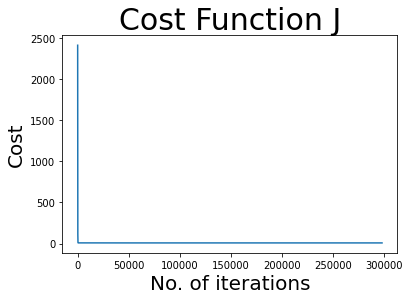

In [ ]:
import matplotlib.pyplot as plt

plt.title('Cost Function J', size=30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost',size=20)
plt.plot(cost_list)
plt.show()

In [ ]:
z_list=[]
for i in range (2938):
  z=i
  z_list.append(z)
  i+=1

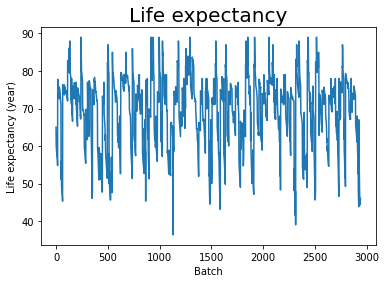

In [ ]:
plt.title('Life expectancy', size=20)
plt.xlabel('Batch',size=10)
plt.ylabel('Life expectancy (year)',size=10)
plt.plot(y)


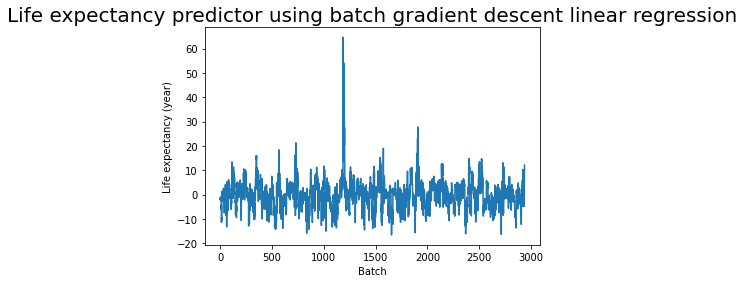

In [ ]:
plt.title('Life expectancy predictor using batch gradient descent linear regression', size=20)
plt.xlabel('Batch',size=10)
plt.ylabel('Life expectancy (year)',size=10)
plt.plot(prediction)